### Тема “Обучение без учителя”

##### Задание 1
> 1. Импортируйте библиотеки pandas, numpy и matplotlib.
> 2. Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
> 3. Создайте датафреймы X и y из этих данных.
> 4. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
> 5. Масштабируйте данные с помощью StandardScaler.
> 6. Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
> 7. Постройте диаграмму рассеяния на этих данных.


##### Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

##### Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

##### Создайте датафреймы X и y из этих данных.

In [3]:
ds = load_boston(); 

In [4]:
x = pd.DataFrame(ds.data, columns = ds.feature_names);
y = pd.DataFrame(ds.target, columns = ['target_price']);

##### Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [5]:
from sklearn.model_selection import train_test_split;
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42);

##### Масштабируйте данные с помощью StandardScaler.

* Для начала посмотрим на признаки и надо ли их маштабировать.

In [6]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.609125,11.569307,10.985050,0.071782,0.556484,6.315891,68.556436,3.808195,9.356436,404.032178,18.318317,356.278342,12.457351
std,8.875058,23.152481,6.894618,0.258447,0.117704,0.709452,27.994922,2.131226,8.589721,166.172655,2.228701,91.566533,7.110381
min,0.009060,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.452000,5.890500,45.550000,2.087875,4.000000,279.000000,16.800000,375.472500,6.772500
50%,0.261390,0.000000,8.560000,0.000000,0.538000,6.210000,77.700000,3.175750,5.000000,330.000000,18.700000,391.305000,10.925000
75%,3.202962,20.000000,18.100000,0.000000,0.631000,6.636750,93.650000,5.400800,12.000000,666.000000,20.200000,395.755000,16.372500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


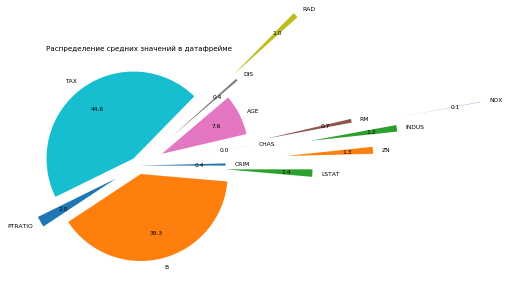

In [23]:

fig = plt.subplots();

plt.rcParams.update({'font.size': 6});

plt.title('Распределение средних значений в датафрейме');
plt.pie(X_train[X_train.columns.tolist()].mean(),
        autopct='%.1f', radius = 1, 
        wedgeprops = {'linewidth': 1}, 
        shadow = False,
        pctdistance = .7,
        labels = X_train.columns.tolist(),
        explode = (0, 1.7, 2, 0.3, 3, 1.5, 0.3, 0.5, 1.5, 0.1, 0.3, .1, 1)
       );
#plt.legend(loc = 'best', labels = X_train.columns.tolist());


* Как мы видим признаки имеют достаточно большой разброс и требуют маштабирование. 
* Например B и NOX.

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
ss = StandardScaler()

X_train_scale = ss.fit_transform(X_train,y = None)
X_test_scale = ss.fit_transform(X_train,y = None)

X_train_scale = pd.DataFrame(X_train_scale, columns = ds.feature_names)
X_test_scale = pd.DataFrame(X_test_scale, columns = ds.feature_names)

##### Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [10]:
from sklearn.manifold import TSNE
model_tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

* Обучим нашу модель

In [11]:
X_train_scale_tsne = model_tsne.fit_transform(X_train_scale);
X_test_scale_tsne = model_tsne.fit_transform(X_test_scale);

##### Постройте диаграмму рассеяния на этих данных.

* Проверим что наши датасеты одинаковые

In [12]:
if X_train_scale_tsne.shape == X_test_scale_tsne.shape:
    print(True)
else:
    print(False)    

True


* Построение диаграммы

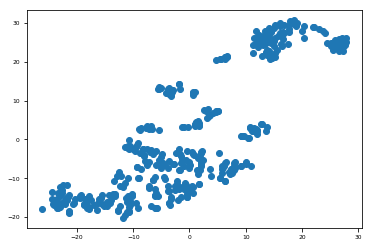

In [13]:
plt.scatter(X_train_scale_tsne[:,0],X_train_scale_tsne[:,1]);

### Задание 2
> 1. С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
> 2. Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
> 3. Вычислите средние значения price и CRIM в разных кластерах.


##### С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

In [14]:
# Импортируем модуль
from sklearn.cluster import KMeans

# Зададим разбиение на 3 кластера
model_km = KMeans(n_clusters = 3, max_iter = 100, random_state = 42)

##### Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

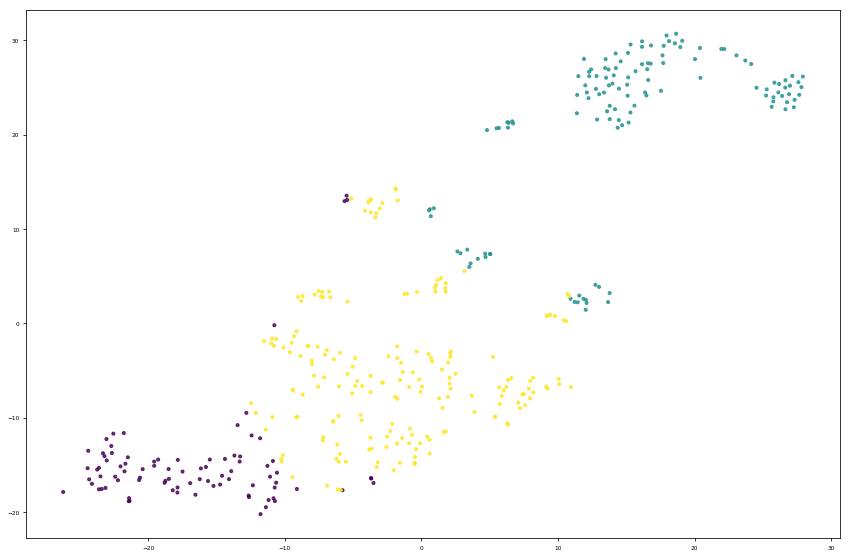

In [15]:
# Обучим модель
fig,ax = plt.subplots(figsize = (15,10), dpi = 70)
k_train = model_km.fit_predict(X_train_scale)
plt.scatter(X_train_scale_tsne[:,0],X_train_scale_tsne[:,1],c = k_train, alpha = 0.8, s = 10 );

##### Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
y_train_price = pd.DataFrame(y_train['target_price'])

y_train_price = y_train_price.reset_index()

y_train_price = pd.DataFrame(y_train_price['target_price'])

result_ = pd.concat ([X_train_scale['CRIM'] , y_train_price ,pd.DataFrame(k_train)], axis = 1, sort = False)

result_ = result_.rename(columns = {'target_price' : 'price', 0 : 'cluster'})

result_.groupby('cluster').mean()

,CRIM,price
cluster,,
0,-0.398864,27.788372
1,0.810904,16.165354
2,-0.359594,24.958115


### * Задание 3
> 1. Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
> 2. Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


##### Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [17]:
k_test = model_km.fit_predict(X_test)

#X_test.head()

##### Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [18]:
X_test.reset_index(inplace = True)

X_test = X_test.loc[:,'CRIM':'LSTAT']

X_test = pd.DataFrame(X_test)

#X_test.head()

In [19]:
# Price dataframe

X_test_price = pd.DataFrame(y_test['target_price'])

X_test_price.reset_index(inplace = True)

X_test_price = X_test_price.loc[:, 'target_price']

X_test_price = pd.DataFrame(X_test_price)

#X_test_price.head()

In [20]:
# Cluster dataframe

k_test_cluster = pd.DataFrame(k_test)

k_test_cluster = k_test_cluster.rename(columns = {0 : 'cluster'})

#k_test_cluster.head()

In [21]:
# Объединяем в один датафрейм и получим результат

result = pd.concat ([X_test['CRIM'] , X_test_price ,k_test_cluster], axis = 1, sort = False)

result = result.rename(columns = {'target_price' : 'price'})

result.groupby('cluster').mean()

,CRIM,price
cluster,,
0,0.246421,23.911594
1,8.469302,17.392308
2,19.021666,12.814286
